### Task 2: Trinary Classification

In [47]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

print(tf.__version__)

1.7.0


In [48]:
#Load data
df = pd.read_csv('./train.csv')
#df.head(5)

df_test = pd.read_csv('./test.csv')
X_test = df_test._drop_axis(['Id'], axis=1)
#X_test.head(5)

In [49]:
features = df.columns.values[2:df.shape[1]]

In [50]:
num_features = features.shape[0]

In [51]:
print(df.columns.values)

['Id' 'y' 'x1' 'x2' 'x3' 'x4' 'x5' 'x6' 'x7' 'x8' 'x9' 'x10' 'x11' 'x12'
 'x13' 'x14' 'x15' 'x16']


<function matplotlib.pyplot.show>

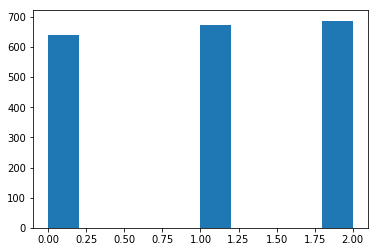

In [52]:
#manipulate and format data
X = df.loc[:, features].as_matrix()
y = df.loc[:, 'y'].as_matrix()

#plt.hist(y)
#plt.show

In [53]:
#Set hyperparameters
rate = .1
epochs = 1500
display_step = 500
n = y.size

#Randomly split into training and test
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)
#X_train = np.array(X_train)
#X_test = np.array(X_test)
#y_train = np.array(y_train)
#y_test = np.array(y_test)

X = np.array(X)
y = np.array(y)

In [54]:
#Deep Neural Network, hopefully don't overfit
feature_cols = [tf.feature_column.numeric_column("features", shape=[num_features])]
classifier = tf.estimator.DNNClassifier(feature_columns=feature_cols,
                                       n_classes=3,
                                       hidden_units=[100,150,200,100])

#specific pandas input_fn
train_input_fn = tf.estimator.inputs.numpy_input_fn(
            x={"features": X},
            y=y,
            num_epochs=epochs,
            shuffle=False)

classifier.train(input_fn=train_input_fn, steps=epochs)
print('fit done')

#Define test inputs
#test_input_fn = tf.estimator.inputs.numpy_input_fn(
               # x={"features": X_test},
               # y=y_test,
               # num_epochs=epochs,
               # shuffle=False)

#TODO: use model to make prediction on test set                
                
#Calculate accuracy
#accuracy_score = classifier.evaluate(input_fn=test_input_fn, steps=100)["accuracy"]
#print('\nAccuracy: {0:f}'.format(accuracy_score))


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\GRANTG~1\\AppData\\Local\\Temp\\tmpyzyvg6ib', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000019930714BE0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\GRANTG~1\AppData\Local\Temp\tmpyz

In [36]:
#Define cost and optimization
cost = tf.reduce_sum(tf.pow(y_ - y, 2))/(2*n)

optimizer = tf.train.GradientDescentOptimizer(rate).minimize(cost)

NameError: name 'y_' is not defined

In [ ]:
#Set up session
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

print(x.shape, inputX.shape, y_.shape, inputY.shape)

In [ ]:
#Train

for i in range(epochs):
    sess.run(optimizer, feed_dict={x: inputX, y_: inputY})
    
    #log
    if (i) % display_step == 0:
        cc = sess.run(cost, feed_dict={x: inputX, y_:inputY})
        print("Training step:", '%04d' % (i), "cost=", "{:.9f}".format(cc)) 
print("Optimization Finished!")
training_cost = sess.run(cost, feed_dict={x: inputX, y_: inputY})
print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')